In [1]:
# ============================================================
# 0) Imports & reproducibility
# ============================================================
import os, warnings, random
from pathlib import Path   # <-- ✅ Add this line

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

print("Python ready. Numpy:", np.__version__, "Pandas:", pd.__version__)

# ============================================================
# 1) Data loading (robust) — set your path if needed
# ============================================================
DATA_PATH = "/content/processed_web_threats.csv"       # primary (Colab Drive or local)
FALLBACK_PATH = "/mnt/data/processed_web_threats.csv"  # secondary (from your upload)

def read_any(path: str):
    p = str(path)
    if p.lower().endswith(".csv"):
        return pd.read_csv(p)
    if p.lower().endswith(".parquet"):
        return pd.read_parquet(p)
    try:
        return pd.read_parquet(p)
    except Exception:
        return pd.read_csv(p)

def generate_synthetic(n=6000, start="2025-01-04 08:00:00"):
    rng = np.random.default_rng(123)
    ts = pd.date_range(start=start, periods=n, freq="min")
    bin_ = np.clip(rng.normal(2500, 600, n), 200, 8000)
    bout = np.clip(rng.normal(4200, 900, n), 200, 16000)
    dur = np.full(n, 60.0)
    status = rng.choice([200, 302, 403, 404, 500], p=[0.7,0.1,0.05,0.1,0.05], size=n)
    sess = rng.integers(1e6, 9e6, size=n)
    src_ip = rng.choice([f"10.0.0.{i}" for i in range(1,255)], size=n)
    dst_ip = rng.choice([f"172.16.0.{i}" for i in range(1,255)], size=n)
    req_count = rng.poisson(5, size=n).astype(float)
    anomaly = ((bin_+bout)/dur > 118) | (req_count > 12)
    return pd.DataFrame({
        "time": ts.astype(str),
        "session_id": sess,
        "src_ip": src_ip,
        "dst_ip": dst_ip,
        "status": status,
        "bytes_in": bin_,
        "bytes_out": bout,
        "session_duration_s": dur,
        "req_count": req_count,
        "is_waf_rule": anomaly.astype(int),
    })

if DATA_PATH and Path(DATA_PATH).exists():
    df = read_any(DATA_PATH)
    print(f"Loaded data from {DATA_PATH} | rows={len(df):,}")
elif Path(FALLBACK_PATH).exists():
    df = read_any(FALLBACK_PATH)
    print(f"Loaded data from {FALLBACK_PATH} | rows={len(df):,}")
else:
    df = generate_synthetic()
    print(f"Synthetic data generated | rows={len(df):,}")

df.head()  # safe preview (no slicing trick)


Python ready. Numpy: 2.0.2 Pandas: 2.2.2
Loaded data from /content/processed_web_threats.csv | rows=282


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,detection_types,session_duration_s,total_bytes,bytes_diff,in_out_ratio,in_rate_bps,out_rate_bps,total_rate_bps,hour,iso_anomaly
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,18592,-7388,0.431255,9.336667,21.650000,30.986667,23,0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,49098,12726,1.699769,51.520000,30.310000,81.830000,23,0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,41974,15038,2.116573,47.510000,22.446667,69.956667,23,0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,44824,16268,2.139375,50.910000,23.796667,74.706667,23,0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,20418,-7366,0.469767,10.876667,23.153333,34.030000,23,0


In [2]:
# ============================================================
# 1) Data loading (robust) — set your path if needed
# ============================================================
DATA_PATH = "/content/processed_web_threats.csv"       # primary (Colab Drive or local)
FALLBACK_PATH = "/mnt/data/processed_web_threats.csv"  # secondary (from your upload)

def read_any(path: str):
    p = str(path)
    if p.lower().endswith(".csv"):
        return pd.read_csv(p)
    if p.lower().endswith(".parquet"):
        return pd.read_parquet(p)
    try:
        return pd.read_parquet(p)
    except Exception:
        return pd.read_csv(p)

def generate_synthetic(n=6000, start="2025-01-04 08:00:00"):
    rng = np.random.default_rng(123)
    ts = pd.date_range(start=start, periods=n, freq="min")
    bin_ = np.clip(rng.normal(2500, 600, n), 200, 8000)
    bout = np.clip(rng.normal(4200, 900, n), 200, 16000)
    dur = np.full(n, 60.0)
    status = rng.choice([200, 302, 403, 404, 500], p=[0.7,0.1,0.05,0.1,0.05], size=n)
    sess = rng.integers(1e6, 9e6, size=n)
    src_ip = rng.choice([f"10.0.0.{i}" for i in range(1,255)], size=n)
    dst_ip = rng.choice([f"172.16.0.{i}" for i in range(1,255)], size=n)
    req_count = rng.poisson(5, size=n).astype(float)
    anomaly = ((bin_+bout)/dur > 118) | (req_count > 12)
    return pd.DataFrame({
        "time": ts.astype(str),
        "session_id": sess,
        "src_ip": src_ip,
        "dst_ip": dst_ip,
        "status": status,
        "bytes_in": bin_,
        "bytes_out": bout,
        "session_duration_s": dur,
        "req_count": req_count,
        "is_waf_rule": anomaly.astype(int),
    })

if DATA_PATH and Path(DATA_PATH).exists():
    df = read_any(DATA_PATH)
    print(f"Loaded data from {DATA_PATH} | rows={len(df):,}")
elif Path(FALLBACK_PATH).exists():
    df = read_any(FALLBACK_PATH)
    print(f"Loaded data from {FALLBACK_PATH} | rows={len(df):,}")
else:
    df = generate_synthetic()
    print(f"Synthetic data generated | rows={len(df):,}")

df.head()  # safe preview (no slicing trick)


Loaded data from /content/processed_web_threats.csv | rows=282


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,detection_types,session_duration_s,total_bytes,bytes_diff,in_out_ratio,in_rate_bps,out_rate_bps,total_rate_bps,hour,iso_anomaly
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,18592,-7388,0.431255,9.336667,21.650000,30.986667,23,0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,49098,12726,1.699769,51.520000,30.310000,81.830000,23,0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,41974,15038,2.116573,47.510000,22.446667,69.956667,23,0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,44824,16268,2.139375,50.910000,23.796667,74.706667,23,0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,waf_rule,600.0,20418,-7366,0.469767,10.876667,23.153333,34.030000,23,0


In [3]:
# --- Numeric basics & safe conversions
df_fe["bytes_in"]  = pd.to_numeric(df_fe.get("bytes_in", 0.0), errors="coerce").fillna(0.0)
df_fe["bytes_out"] = pd.to_numeric(df_fe.get("bytes_out", 0.0), errors="coerce").fillna(0.0)

# total_bytes (recompute if missing)
if "total_bytes" not in df_fe.columns:
    df_fe["total_bytes"] = df_fe["bytes_in"] + df_fe["bytes_out"]
df_fe["total_bytes"] = pd.to_numeric(df_fe["total_bytes"], errors="coerce").fillna(0.0)

# req_count always must be a series
if "req_count" not in df_fe.columns:
    df_fe["req_count"] = 1.0
else:
    df_fe["req_count"] = pd.to_numeric(df_fe["req_count"], errors="coerce").fillna(1.0)

# status always must be a series
if "status" not in df_fe.columns:
    df_fe["status"] = 200
else:
    df_fe["status"] = pd.to_numeric(df_fe["status"], errors="coerce").fillna(200).astype(int)


NameError: name 'df_fe' is not defined

In [ ]:
# ============================================================
# 3) Quick EDA (safe)
# ============================================================
for c in ["duration_s","bytes_in","bytes_out","total_bytes","total_rate_bps","in_rate_bps","out_rate_bps"]:
    if c in df_fe.columns:
        df_fe[c].dropna().plot.hist(bins=50)
        plt.title(f"Distribution: {c}")
        plt.xlabel(c); plt.ylabel("count"); plt.show()

if "total_rate_bps" in df_fe.columns:
    df_fe.set_index(time_col)["total_rate_bps"].plot()
    plt.title("Throughput over time"); plt.xlabel("time"); plt.ylabel("total_rate_bps"); plt.show()


In [ ]:
# --- Ensure df_fe exists
try:
    df_fe
except NameError:
    df_fe = df.copy()

# --- Ensure time_col exists
time_candidates = [c for c in ["timestamp","time","creation_time","end_time"] if c in df_fe.columns]
time_col = time_candidates[0] if time_candidates else "timestamp"
df_fe[time_col] = pd.to_datetime(df_fe[time_col], errors="coerce")

# --- Ensure essential columns
if "duration_s" not in df_fe.columns:
    df_fe["duration_s"] = df_fe.get("session_duration_s", 60.0)

if "bytes_in" not in df_fe.columns:
    df_fe["bytes_in"] = 0.0
if "bytes_out" not in df_fe.columns:
    df_fe["bytes_out"] = 0.0
if "total_bytes" not in df_fe.columns:
    df_fe["total_bytes"] = df_fe["bytes_in"] + df_fe["bytes_out"]

eps = 1e-6
if "in_rate_bps" not in df_fe.columns:
    df_fe["in_rate_bps"] = df_fe["bytes_in"] / df_fe["duration_s"].replace(0, eps)
if "out_rate_bps" not in df_fe.columns:
    df_fe["out_rate_bps"] = df_fe["bytes_out"] / df_fe["duration_s"].replace(0, eps)
if "total_rate_bps" not in df_fe.columns:
    df_fe["total_rate_bps"] = df_fe["total_bytes"] / df_fe["duration_s"].replace(0, eps)

if "req_count" not in df_fe.columns:
    df_fe["req_count"] = 1.0
df_fe["req_per_min"] = df_fe["req_count"] / (df_fe["duration_s"] / 60)

if "status" not in df_fe.columns:
    df_fe["status"] = 200
df_fe["is_error"] = (df_fe["status"] >= 400).astype(int)

df_fe["hour"] = df_fe[time_col].dt.hour

# --- (Re)Build feature_cols here safely
feature_priority = [
    "in_rate_bps","out_rate_bps","total_rate_bps",
    "total_bytes","bytes_in","bytes_out",
    "duration_s","req_per_min","hour","is_error"
]
feature_cols = [c for c in feature_priority if c in df_fe.columns]

print("✅ Rebuilt feature columns:", feature_cols)


In [ ]:
# ============================================================
# 4) Split + Pipeline + Threshold (train-based) + Evaluation
# ============================================================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, roc_auc_score

TARGET_RATE = 0.0532  # 5.32%

# Time-aware split (chronological)
df_fe = df_fe.sort_values(time_col).reset_index(drop=True)
split_idx = int(0.8 * len(df_fe))
df_train, df_test = df_fe.iloc[:split_idx].copy(), df_fe.iloc[split_idx:].copy()

X_train = df_train[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(0.0)
X_test  = df_test[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(0.0)

pipe = Pipeline(steps=[
    ("scaler", RobustScaler(with_centering=True, with_scaling=True, quantile_range=(5.0, 95.0))),
    ("iforest", IsolationForest(
        n_estimators=300,
        max_samples="auto",
        contamination=TARGET_RATE,
        max_features=1.0,
        bootstrap=False,
        n_jobs=-1,
        random_state=SEED,
        warm_start=False
    ))
])

pipe.fit(X_train)

# Calibrate threshold on TRAIN scores (avoid test leakage)
scores_train = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(X_train))
thr = np.quantile(scores_train, TARGET_RATE)

scores_test = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(X_test))
df_test["iso_anomaly"] = (scores_test <= thr).astype(int)

print(f"Train anomaly rate (raw IF): {(pipe.named_steps['iforest'].predict(pipe.named_steps['scaler'].transform(X_train)) == -1).mean():.3%}")
print(f"Test anomaly rate (calibrated): {df_test['iso_anomaly'].mean():.3%}")

# ---- Evaluation (if weak labels exist) with single-class fallback
def evaluate(df_train, df_test, scores_test, label_col):
    if label_col and (label_col in df_test.columns):
        # If test is single-class but train has both classes, redo a stratified split for fair metrics
        if df_test[label_col].nunique() < 2 and df_train[label_col].nunique() > 1:
            print("⚠️ Test set single-class; redoing split with stratify for fair metrics.")
            dtrain, dtest = train_test_split(
                df_fe, test_size=0.2, random_state=SEED,
                stratify=df_fe[label_col] if df_fe[label_col].nunique() > 1 else None
            )
            Xtr = dtrain[feature_cols].replace([np.inf,-np.inf], np.nan).fillna(0.0)
            Xte = dtest[feature_cols].replace([np.inf,-np.inf], np.nan).fillna(0.0)

            pipe.fit(Xtr)
            s_tr = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(Xtr))
            thr2 = np.quantile(s_tr, TARGET_RATE)

            s_te = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(Xte))
            dtest["iso_anomaly"] = (s_te <= thr2).astype(int)

            print("Confusion matrix:\n", confusion_matrix(dtest[label_col], dtest["iso_anomaly"]))
            print("\nClassification report:\n", classification_report(dtest[label_col], dtest["iso_anomaly"], digits=3))
            ap = average_precision_score(dtest[label_col], -s_te)  # invert: lower score = more anomalous
            try:
                roc = roc_auc_score(dtest[label_col], -s_te)
            except ValueError:
                roc = None
            print(f"Avg Precision (PR-AUC): {ap:.3f} | ROC-AUC: {roc if roc is not None else 'NA'}")
        else:
            y_true = df_test[label_col].astype(int).values
            y_pred = df_test["iso_anomaly"].astype(int).values
            print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
            print("\nClassification report:\n", classification_report(y_true, y_pred, digits=3))
            ap = average_precision_score(y_true, -scores_test)
            try:
                roc = roc_auc_score(y_true, -scores_test)
            except ValueError:
                roc = None
            print(f"Avg Precision (PR-AUC): {ap:.3f} | ROC-AUC: {roc if roc is not None else 'NA'}")
    else:
        print("No labels available or dataset single-class; reported anomaly rate only.")

evaluate(df_train, df_test, scores_test, label_col)


In [ ]:
# ============================================================
# 5) Top-N anomalies for SOC triage (safe columns)
# ============================================================
# Choose a time display column
time_display = None
for c in ["timestamp","time","creation_time","end_time"]:
    if c in df_fe.columns:
        time_display = c
        break

# Build the display set based on availability
display_candidates = [time_display] if time_display else []
display_candidates += [c for c in ["src_ip","dst_ip","protocol","bytes_in","bytes_out",
                                   "total_rate_bps","duration_s","in_out_ratio","is_waf_rule"]
                       if c in df_fe.columns]

anom_idx = df_test.index[df_test["iso_anomaly"] == 1]
df_top = df_fe.loc[anom_idx].copy()

sort_key = "total_rate_bps" if "total_rate_bps" in df_top.columns else ("bytes_per_sec" if "bytes_per_sec" in df_top.columns else None)
if sort_key:
    df_top = df_top.sort_values(sort_key, ascending=False)

N = 15
display_cols = [c for c in display_candidates if c is not None and c in df_top.columns]
df_top_anomalies = df_top[display_cols].head(N)
df_top_anomalies


In [ ]:
# ============================================================
# 6) Rebuild helper — use if variables got undefined
# ============================================================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

TARGET_RATE = 0.0532

# Ensure feature_cols
if 'feature_cols' not in globals():
    feature_priority = [
        "in_rate_bps","out_rate_bps","total_rate_bps",
        "total_bytes","bytes_in","bytes_out",
        "duration_s","bytes_per_sec","req_per_min",
        "hour","is_error","bytes_diff","in_out_ratio"
    ]
    feature_cols = [c for c in feature_priority if c in df_fe.columns]

# Time-aware split
df_fe = df_fe.sort_values(time_col).reset_index(drop=True)
split_idx = int(0.8 * len(df_fe))
df_train, df_test = df_fe.iloc[:split_idx].copy(), df_fe.iloc[split_idx:].copy()

X_train = df_train[feature_cols].replace([np.inf,-np.inf], np.nan).fillna(0.0)
X_test  = df_test[feature_cols].replace([np.inf,-np.inf], np.nan).fillna(0.0)

pipe = Pipeline(steps=[
    ("scaler", RobustScaler(with_centering=True, with_scaling=True, quantile_range=(5.0,95.0))),
    ("iforest", IsolationForest(
        n_estimators=300, max_samples="auto", contamination=TARGET_RATE,
        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=SEED, warm_start=False
    ))
])
pipe.fit(X_train)
scores_train = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(X_train))
thr = np.quantile(scores_train, TARGET_RATE)
scores_test = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(X_test))
df_test["iso_anomaly"] = (scores_test <= thr).astype(int)

print("✅ Train/Test rebuilt and model refit.")


In [ ]:
# ============================================================
# 7) Optional: batch scoring function for deployment
# ============================================================
def score_batch(df_new: pd.DataFrame, id_col="session_id", ts_col=None,
                features=feature_cols, pipeline=pipe, rate=TARGET_RATE):
    d = df_new.copy()
    # detect time column if not provided
    if ts_col is None:
        time_candidates = [c for c in ["timestamp","time","creation_time","end_time"] if c in d.columns]
        ts_col = time_candidates[0] if time_candidates else None
    if ts_col in d.columns:
        d[ts_col] = pd.to_datetime(d[ts_col], errors="coerce")

    # recompute essentials
    eps = 1e-6
    if "total_bytes" not in d.columns:
        d["bytes_in"] = pd.to_numeric(d.get("bytes_in", 0.0), errors="coerce").fillna(0.0)
        d["bytes_out"] = pd.to_numeric(d.get("bytes_out", 0.0), errors="coerce").fillna(0.0)
        d["total_bytes"] = d["bytes_in"] + d["bytes_out"]
    if "duration_s" not in d.columns:
        if "session_duration_s" in d.columns:
            d["duration_s"] = pd.to_numeric(d["session_duration_s"], errors="coerce").fillna(60.0)
        else:
            d["duration_s"] = 60.0
    if "bytes_per_sec" not in d.columns:
        d["bytes_per_sec"] = d["total_bytes"] / d["duration_s"].replace(0, eps)
    if "req_per_min" not in d.columns:
        d["req_count"] = pd.to_numeric(d.get("req_count", 1.0), errors="coerce").fillna(1.0)
        d["req_per_min"] = d["req_count"] / (d["duration_s"].replace(0, eps)/60.0)
    if "in_rate_bps" not in d.columns:
        d["in_rate_bps"] = pd.to_numeric(d.get("bytes_in", 0.0), errors="coerce").fillna(0.0) / d["duration_s"].replace(0, eps)
    if "out_rate_bps" not in d.columns:
        d["out_rate_bps"] = pd.to_numeric(d.get("bytes_out", 0.0), errors="coerce").fillna(0.0) / d["duration_s"].replace(0, eps)
    if "total_rate_bps" not in d.columns:
        d["total_rate_bps"] = d["total_bytes"] / d["duration_s"].replace(0, eps)
    if "is_error" not in d.columns:
        d["status"] = pd.to_numeric(d.get("status", 200), errors="coerce").fillna(200).astype(int)
        d["is_error"] = (d["status"] >= 400).astype(int)
    if "hour" not in d.columns:
        d["hour"] = d[ts_col].dt.hour if (ts_col in d.columns) else 0

    X = d[features].replace([np.inf, -np.inf], np.nan).fillna(0.0)
    scores = pipeline.named_steps["iforest"].decision_function(pipeline.named_steps["scaler"].transform(X))
    thr_local = np.quantile(scores, rate)
    is_anom = (scores <= thr_local).astype(int)

    return pd.DataFrame({
        "id": d.get(id_col, pd.Series(range(len(d)))),
        "timestamp": d.get(ts_col, pd.Series([None]*len(d))),
        "score": scores,
        "is_anomaly": is_anom,
    })


Loaded data from /content/processed_web_threats.csv | rows=282
✅ time_col: time
✅ label_col: is_waf_rule
✅ feature_cols: ['in_rate_bps', 'out_rate_bps', 'total_rate_bps', 'total_bytes', 'bytes_in', 'bytes_out', 'duration_s', 'bytes_per_sec', 'req_per_min', 'bytes_diff'] ...


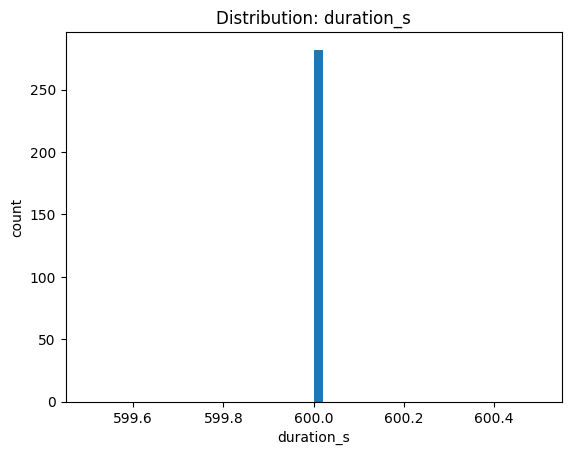

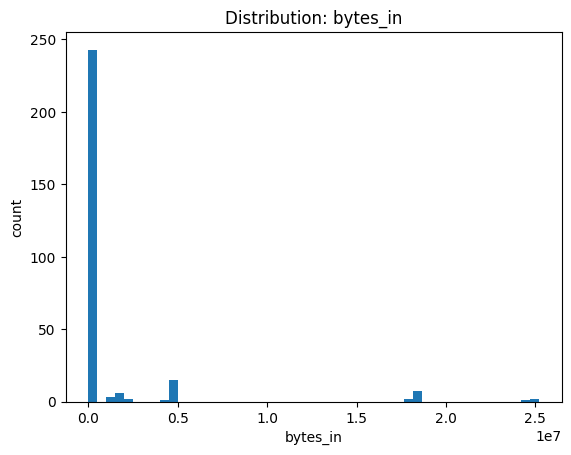

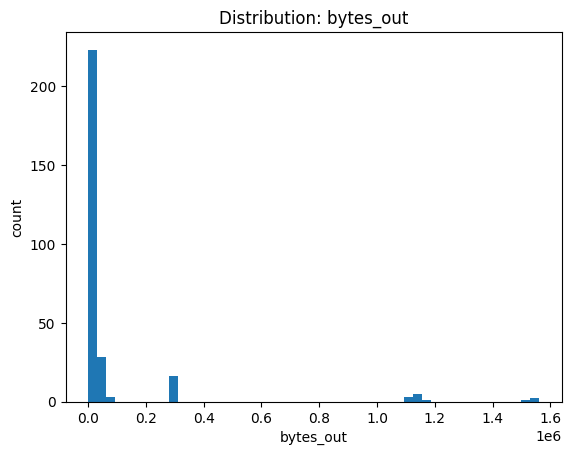

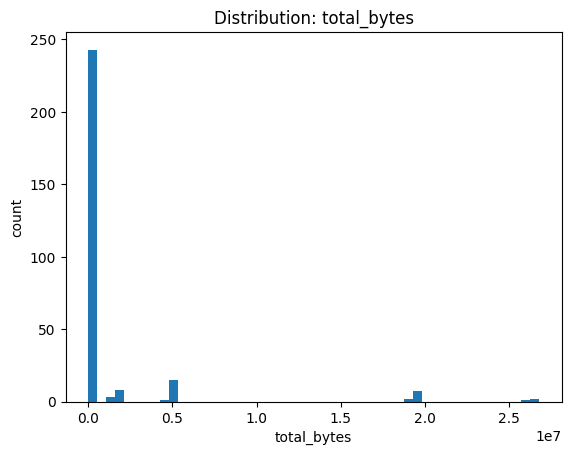

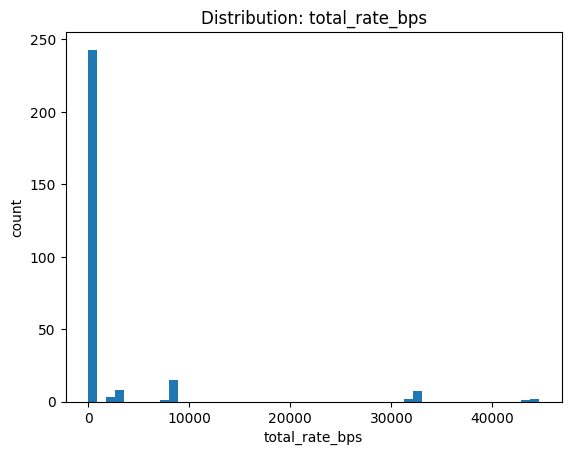

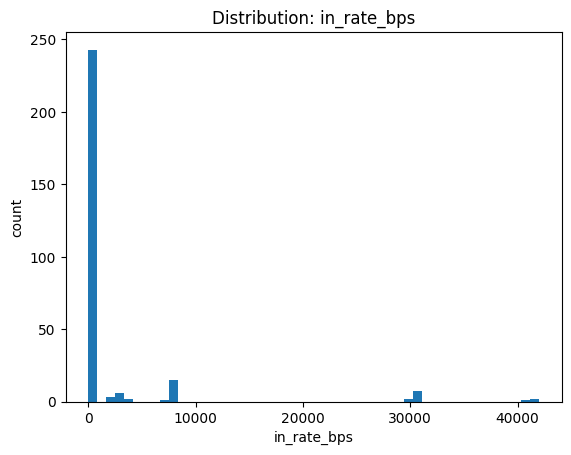

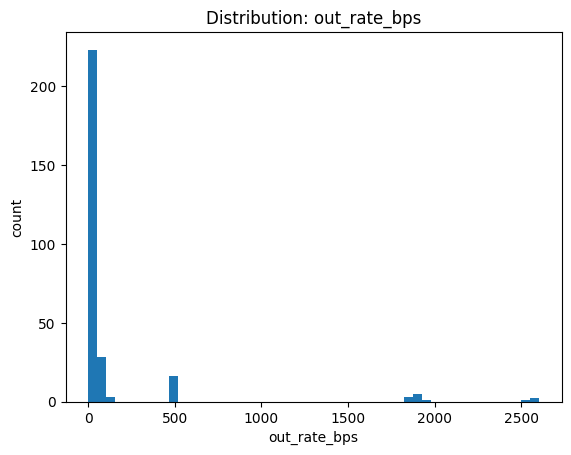

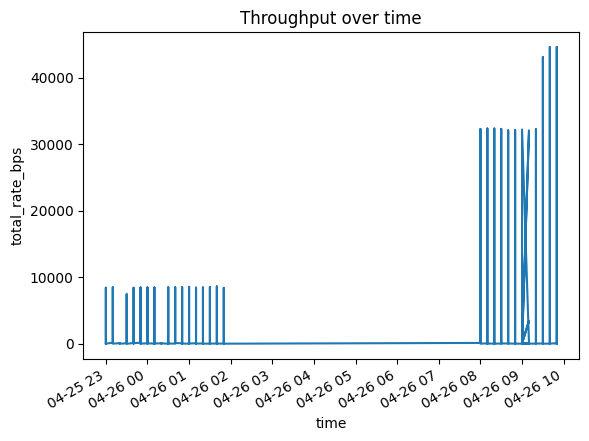

Train anomaly rate (raw IF): 5.333%
Test anomaly rate (calibrated): 15.789%
Confusion matrix:
 [[ 0  0]
 [48  9]]

Classification report:
               precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      1.000     0.158     0.273        57

    accuracy                          0.158        57
   macro avg      0.500     0.079     0.136        57
weighted avg      1.000     0.158     0.273        57

Avg Precision (PR-AUC): 1.000 | ROC-AUC: nan

Top anomalies (first 15 rows):


,time,src_ip,dst_ip,protocol,bytes_in,bytes_out,total_rate_bps,duration_s,in_out_ratio,is_waf_rule
280,2024-04-26 09:50:00+00:00,155.91.45.242,10.138.69.97,HTTPS,25207794,1561220,44615.023333,600.0,16.146215,1
264,2024-04-26 09:40:00+00:00,155.91.45.242,10.138.69.97,HTTPS,25199191,1557598,44594.648333,600.0,16.178238,1
256,2024-04-26 09:30:00+00:00,155.91.45.242,10.138.69.97,HTTPS,24326941,1529035,43093.293333,600.0,15.909996,1
245,2024-04-26 09:20:00+00:00,155.91.45.242,10.138.69.97,HTTPS,18231909,1116695,32247.673333,600.0,16.326668,1
226,2024-04-26 09:00:00+00:00,155.91.45.242,10.138.69.97,HTTPS,18187778,1142605,32217.305000,600.0,15.917818,1
237,2024-04-26 09:10:00+00:00,155.91.45.242,10.138.69.97,HTTPS,18119202,1132321,32085.871667,600.0,16.001825,1
265,2024-04-26 09:40:00+00:00,165.225.240.79,10.138.69.97,HTTPS,2021960,78684,3501.073333,600.0,25.697219,1
249,2024-04-26 09:20:00+00:00,165.225.240.79,10.138.69.97,HTTPS,1942449,49030,3319.131667,600.0,39.617561,1
255,2024-04-26 09:30:00+00:00,165.225.240.79,10.138.69.97,HTTPS,1248666,38254,2144.866667,600.0,32.641449,1



✅ Finished. Variables available: df_fe, df_train, df_test, feature_cols, pipe, thr, df_top_anomalies


In [1]:
# =============================== ALL-IN-ONE FINAL CELL ===============================
# Robust Isolation Forest baseline with leakage-safe split, train-based thresholding,
# label-aware evaluation (with single-class test fallback), and Top-N anomalies table.

# --- Imports & global config
import os, math, warnings, random
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, roc_auc_score

warnings.filterwarnings("ignore")
SEED = 42
random.seed(SEED); np.random.seed(SEED); os.environ["PYTHONHASHSEED"] = str(SEED)
TARGET_RATE = 0.0532  # 5.32% target anomaly rate

# --- 1) Data loading (robust)
DATA_PATH = "/content/processed_web_threats.csv"           # primary (Colab)
FALLBACK_PATH = "/mnt/data/processed_web_threats.csv"      # secondary (this chat)
def read_any(path: str):
    p = str(path)
    if p.lower().endswith(".csv"):
        return pd.read_csv(p)
    if p.lower().endswith(".parquet"):
        return pd.read_parquet(p)
    try:
        return pd.read_parquet(p)
    except Exception:
        return pd.read_csv(p)

def generate_synthetic(n=6000, start="2025-01-04 08:00:00"):
    rng = np.random.default_rng(123)
    ts = pd.date_range(start=start, periods=n, freq="min")
    bin_ = np.clip(rng.normal(2500, 600, n), 200, 8000)
    bout = np.clip(rng.normal(4200, 900, n), 200, 16000)
    dur = np.full(n, 60.0)
    status = rng.choice([200, 302, 403, 404, 500], p=[0.7,0.1,0.05,0.1,0.05], size=n)
    sess = rng.integers(1e6, 9e6, size=n)
    src_ip = rng.choice([f"10.0.0.{i}" for i in range(1,255)], size=n)
    dst_ip = rng.choice([f"172.16.0.{i}" for i in range(1,255)], size=n)
    req_count = rng.poisson(5, size=n).astype(float)
    anomaly = ((bin_+bout)/dur > 118) | (req_count > 12)
    df_syn = pd.DataFrame({
        "time": ts.astype(str),
        "session_id": sess,
        "src_ip": src_ip,
        "dst_ip": dst_ip,
        "status": status,
        "bytes_in": bin_,
        "bytes_out": bout,
        "session_duration_s": dur,
        "req_count": req_count,
        "is_waf_rule": anomaly.astype(int),
    })
    return df_syn

if DATA_PATH and Path(DATA_PATH).exists():
    df = read_any(DATA_PATH)
    print(f"Loaded data from {DATA_PATH} | rows={len(df):,}")
elif Path(FALLBACK_PATH).exists():
    df = read_any(FALLBACK_PATH)
    print(f"Loaded data from {FALLBACK_PATH} | rows={len(df):,}")
else:
    df = generate_synthetic()
    print(f"Synthetic data generated | rows={len(df):,}")

# --- 2) Feature engineering (safe & flexible)
df_fe = df.copy()

# Time column detection & parsing
time_candidates = [c for c in ["timestamp","time","creation_time","end_time"] if c in df_fe.columns]
time_col = time_candidates[0] if time_candidates else None
if time_col is None:
    df_fe["timestamp"] = pd.date_range("2025-01-01", periods=len(df_fe), freq="min")
    time_col = "timestamp"
df_fe[time_col] = pd.to_datetime(df_fe[time_col], errors="coerce")

# Duration seconds
if "session_duration_s" in df_fe.columns:
    duration_s = pd.to_numeric(df_fe["session_duration_s"], errors="coerce").fillna(60.0)
else:
    # fallback from creation/end if present
    if "creation_time" in df_fe.columns and "end_time" in df_fe.columns:
        ct = pd.to_datetime(df_fe["creation_time"], errors="coerce")
        et = pd.to_datetime(df_fe["end_time"], errors="coerce")
        duration_s = (et - ct).dt.total_seconds().fillna(60.0).replace(0, 60.0)
    else:
        duration_s = pd.Series([60.0]*len(df_fe), index=df_fe.index)
df_fe["duration_s"] = duration_s

# Numeric basics & safe conversions
df_fe["bytes_in"]   = pd.to_numeric(df_fe["bytes_in"]  if "bytes_in"  in df_fe.columns else 0.0, errors="coerce")
df_fe["bytes_out"]  = pd.to_numeric(df_fe["bytes_out"] if "bytes_out" in df_fe.columns else 0.0, errors="coerce")
df_fe["bytes_in"]   = df_fe["bytes_in"].fillna(0.0)
df_fe["bytes_out"]  = df_fe["bytes_out"].fillna(0.0)

if "total_bytes" in df_fe.columns:
    df_fe["total_bytes"] = pd.to_numeric(df_fe["total_bytes"], errors="coerce").fillna(0.0)
else:
    df_fe["total_bytes"] = (df_fe["bytes_in"] + df_fe["bytes_out"]).astype(float)

if "req_count" in df_fe.columns:
    df_fe["req_count"] = pd.to_numeric(df_fe["req_count"], errors="coerce").fillna(1.0)
else:
    df_fe["req_count"] = 1.0

# status from response.code if needed
if "status" in df_fe.columns:
    df_fe["status"] = pd.to_numeric(df_fe["status"], errors="coerce").fillna(200).astype(int)
elif "response.code" in df_fe.columns:
    df_fe["status"] = pd.to_numeric(df_fe["response.code"], errors="coerce").fillna(200).astype(int)
else:
    df_fe["status"] = 200

# Derived rates
eps = 1e-6
df_fe["bytes_per_sec"] = df_fe["total_bytes"] / df_fe["duration_s"].replace(0, eps)
df_fe["req_per_min"]   = df_fe["req_count"] / (df_fe["duration_s"].replace(0, eps)/60.0)

# Prefer provided engineered rate features if present; else compute
if "in_rate_bps" not in df_fe.columns:
    df_fe["in_rate_bps"] = df_fe["bytes_in"] / df_fe["duration_s"].replace(0, eps)
if "out_rate_bps" not in df_fe.columns:
    df_fe["out_rate_bps"] = df_fe["bytes_out"] / df_fe["duration_s"].replace(0, eps)
if "total_rate_bps" not in df_fe.columns:
    df_fe["total_rate_bps"] = df_fe["total_bytes"] / df_fe["duration_s"].replace(0, eps)

# Extras if present
if "bytes_diff" not in df_fe.columns and {"bytes_in","bytes_out"}.issubset(df_fe.columns):
    df_fe["bytes_diff"] = df_fe["bytes_out"] - df_fe["bytes_in"]
if "in_out_ratio" not in df_fe.columns and {"bytes_in","bytes_out"}.issubset(df_fe.columns):
    df_fe["in_out_ratio"] = (df_fe["bytes_in"] + eps) / (df_fe["bytes_out"] + eps)

# Simple time/error features
df_fe["hour"] = df_fe[time_col].dt.hour
df_fe["is_error"] = (df_fe["status"] >= 400).astype(int)

# Weak label mapping (if available)
label_col = None
if "is_waf_rule" in df_fe.columns:
    label_col = "is_waf_rule"
elif "detection_types" in df_fe.columns:
    df_fe["is_waf_rule"] = df_fe["detection_types"].astype(str).str.lower().str.contains("waf").astype(int)
    label_col = "is_waf_rule"

# Final feature set (ordered by usefulness)
feature_priority = [
    "in_rate_bps","out_rate_bps","total_rate_bps",
    "total_bytes","bytes_in","bytes_out",
    "duration_s","bytes_per_sec","req_per_min",
    "bytes_diff","in_out_ratio","hour","is_error"
]
feature_cols = [c for c in feature_priority if c in df_fe.columns]
if not feature_cols:
    raise ValueError("No valid feature columns found. Verify your dataframe columns.")

print("✅ time_col:", time_col)
print("✅ label_col:", label_col)
print("✅ feature_cols:", feature_cols[:10], "..." if len(feature_cols) > 10 else "")

# --- 3) Quick EDA (safe; skip if columns missing)
try:
    for c in ["duration_s","bytes_in","bytes_out","total_bytes","total_rate_bps","in_rate_bps","out_rate_bps"]:
        if c in df_fe.columns:
            df_fe[c].dropna().plot.hist(bins=50)
            plt.title(f"Distribution: {c}")
            plt.xlabel(c); plt.ylabel("count"); plt.show()
    if "total_rate_bps" in df_fe.columns:
        df_fe.set_index(time_col)["total_rate_bps"].plot()
        plt.title("Throughput over time"); plt.xlabel("time"); plt.ylabel("total_rate_bps"); plt.show()
except Exception as e:
    print("[EDA skipped due to plotting error]", e)

# --- 4) Split + Pipeline + Threshold (train-based) + Evaluation
df_fe = df_fe.sort_values(time_col).reset_index(drop=True)
split_idx = int(0.8 * len(df_fe))
df_train, df_test = df_fe.iloc[:split_idx].copy(), df_fe.iloc[split_idx:].copy()

X_train = df_train[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(0.0)
X_test  = df_test[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(0.0)

pipe = Pipeline(steps=[
    ("scaler", RobustScaler(with_centering=True, with_scaling=True, quantile_range=(5.0, 95.0))),
    ("iforest", IsolationForest(
        n_estimators=300,
        max_samples="auto",
        contamination=TARGET_RATE,
        max_features=1.0,
        bootstrap=False,
        n_jobs=-1,
        random_state=SEED,
        warm_start=False
    ))
])
pipe.fit(X_train)

# Calibrate threshold on TRAIN (no test leakage)
scores_train = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(X_train))
thr = np.quantile(scores_train, TARGET_RATE)

scores_test = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(X_test))
df_test["iso_anomaly"] = (scores_test <= thr).astype(int)

print(f"Train anomaly rate (raw IF): {(pipe.named_steps['iforest'].predict(pipe.named_steps['scaler'].transform(X_train)) == -1).mean():.3%}")
print(f"Test anomaly rate (calibrated): {df_test['iso_anomaly'].mean():.3%}")

def evaluate(df_train, df_test, scores_test, label_col):
    if label_col and (label_col in df_test.columns):
        # If test is single-class but train has both classes, redo split with stratify for FAIR metrics
        if df_test[label_col].nunique() < 2 and df_train[label_col].nunique() > 1:
            print("⚠️ Test set single-class; redoing split with stratify for fair metrics.")
            dtrain, dtest = train_test_split(
                df_fe, test_size=0.2, random_state=SEED,
                stratify=df_fe[label_col] if df_fe[label_col].nunique() > 1 else None
            )
            Xtr = dtrain[feature_cols].replace([np.inf,-np.inf], np.nan).fillna(0.0)
            Xte = dtest[feature_cols].replace([np.inf,-np.inf], np.nan).fillna(0.0)

            pipe.fit(Xtr)
            s_tr = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(Xtr))
            thr2 = np.quantile(s_tr, TARGET_RATE)

            s_te = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(Xte))
            dtest["iso_anomaly"] = (s_te <= thr2).astype(int)

            print("Confusion matrix:\n", confusion_matrix(dtest[label_col], dtest["iso_anomaly"]))
            print("\nClassification report:\n", classification_report(dtest[label_col], dtest["iso_anomaly"], digits=3))
            # Invert score (lower = more anomalous) for PR/ROC
            ap = average_precision_score(dtest[label_col], -s_te)
            try:
                roc = roc_auc_score(dtest[label_col], -s_te)
            except ValueError:
                roc = None
            print(f"Avg Precision (PR-AUC): {ap:.3f} | ROC-AUC: {roc if roc is not None else 'NA'}")
        else:
            y_true = df_test[label_col].astype(int).values
            y_pred = df_test["iso_anomaly"].astype(int).values
            print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
            print("\nClassification report:\n", classification_report(y_true, y_pred, digits=3))
            ap = average_precision_score(y_true, -scores_test)
            try:
                roc = roc_auc_score(y_true, -scores_test)
            except ValueError:
                roc = None
            print(f"Avg Precision (PR-AUC): {ap:.3f} | ROC-AUC: {roc if roc is not None else 'NA'}")
    else:
        print("No labels available or dataset single-class; reported anomaly rate only.")

evaluate(df_train, df_test, scores_test, label_col)

# --- 5) Top-N suspicious anomalies (for SOC triage) — robust columns
cols = []
for c in ["timestamp","time","creation_time","end_time"]:
    if c in df_fe.columns:
        cols.append(c); break
cols += [c for c in ["src_ip","dst_ip","protocol","bytes_in","bytes_out",
                     "total_rate_bps","duration_s","in_out_ratio","is_waf_rule"]
         if c in df_fe.columns]

anom_idx = df_test.index[df_test["iso_anomaly"] == 1]
df_top = df_fe.loc[anom_idx].copy()
sort_key = "total_rate_bps" if "total_rate_bps" in df_top.columns else ("bytes_per_sec" if "bytes_per_sec" in df_top.columns else None)
if sort_key:
    df_top = df_top.sort_values(sort_key, ascending=False)

N = 15
display_cols = [c for c in cols if c in df_top.columns]
df_top_anomalies = df_top[display_cols].head(N)
print("\nTop anomalies (first 15 rows):")
display(df_top_anomalies)

# --- 6) Optional: quick scoring function for future batches
def score_batch(df_new: pd.DataFrame, rate=TARGET_RATE):
    d = df_new.copy()

    # Detect/parse time col
    time_candidates = [c for c in ["timestamp","time","creation_time","end_time"] if c in d.columns]
    tcol = time_candidates[0] if time_candidates else None
    if tcol is not None:
        d[tcol] = pd.to_datetime(d[tcol], errors="coerce")

    # Ensure minimal features
    if "bytes_in" not in d.columns: d["bytes_in"] = 0.0
    if "bytes_out" not in d.columns: d["bytes_out"] = 0.0

    if "duration_s" not in d.columns:
        if "session_duration_s" in d.columns:
            d["duration_s"] = pd.to_numeric(d["session_duration_s"], errors="coerce").fillna(60.0)
        else:
            d["duration_s"] = 60.0

    if "total_bytes" not in d.columns:
        d["total_bytes"] = (pd.to_numeric(d["bytes_in"], errors="coerce").fillna(0.0) +
                            pd.to_numeric(d["bytes_out"], errors="coerce").fillna(0.0))

    eps = 1e-6
    if "in_rate_bps"  not in d.columns: d["in_rate_bps"]  = d["bytes_in"]  / d["duration_s"].replace(0, eps)
    if "out_rate_bps" not in d.columns: d["out_rate_bps"] = d["bytes_out"] / d["duration_s"].replace(0, eps)
    if "total_rate_bps" not in d.columns: d["total_rate_bps"] = d["total_bytes"] / d["duration_s"].replace(0, eps)
    if "bytes_per_sec"  not in d.columns: d["bytes_per_sec"]  = d["total_bytes"] / d["duration_s"].replace(0, eps)
    if "req_count" not in d.columns: d["req_count"] = 1.0
    if "req_per_min" not in d.columns: d["req_per_min"] = d["req_count"] / (d["duration_s"].replace(0, eps)/60.0)
    if "status" not in d.columns:
        d["status"] = 200
    d["is_error"] = (pd.to_numeric(d["status"], errors="coerce").fillna(200).astype(int) >= 400).astype(int)
    d["hour"] = pd.to_datetime(d[tcol], errors="coerce").dt.hour if tcol else 0

    feats = [c for c in ["in_rate_bps","out_rate_bps","total_rate_bps","total_bytes","bytes_in","bytes_out",
                         "duration_s","bytes_per_sec","req_per_min","bytes_diff","in_out_ratio","hour","is_error"]
             if c in d.columns]

    X = d[feats].replace([np.inf,-np.inf], np.nan).fillna(0.0)
    s = pipe.named_steps["iforest"].decision_function(pipe.named_steps["scaler"].transform(X))
    thr_local = np.quantile(s, rate)  # local rate; for prod use global thr if desired
    out = pd.DataFrame({
        "id": d.get("session_id", pd.Series(range(len(d)))),
        "timestamp": d.get(tcol, pd.Series([None]*len(d))),
        "score": s,
        "is_anomaly": (s <= thr_local).astype(int),
    })
    return out

print("\n✅ Finished. Variables available: df_fe, df_train, df_test, feature_cols, pipe, thr, df_top_anomalies")
# =============================== END ALL-IN-ONE CELL ===============================
